In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Create and plot a linearly separable dataset in 2D with at least 1000 data points.**

In [2]:
# number of data points per class
N_c =500

In [3]:
# initialize the random number generator

rng = np.random.default_rng(seed=43)

In [4]:
# Create data sampling from two Gaussian distributions

x_class0 = rng.normal(loc=-2.2, scale=1.0, size=(N_c, 2))
x_class1 = rng.normal(loc=2.2, scale=1.0, size=(N_c, 2))

# Stack the data
X = np.vstack((x_class0, x_class1))

# add constant dim for intercept
const_dim = np.ones((len(X),1))
X = np.hstack((const_dim, X))

# Create labels
y_class0 = np.ones(N_c) * -1
y_class1 = np.ones(N_c)
y = np.hstack((y_class0, y_class1))

# Shuffle indices
shuffled_indices = rng.permutation(len(X))

# Apply shuffled indices to both X and y
X = X[shuffled_indices]
y = y[shuffled_indices]

In [5]:
X

array([[ 1.        , -2.66951929, -1.0706233 ],
       [ 1.        , -1.77615236, -0.90122656],
       [ 1.        , -2.37655206, -2.56781237],
       ...,
       [ 1.        ,  4.13262174,  2.01172822],
       [ 1.        ,  3.0184104 ,  2.28005055],
       [ 1.        ,  2.4916736 ,  3.00368002]])

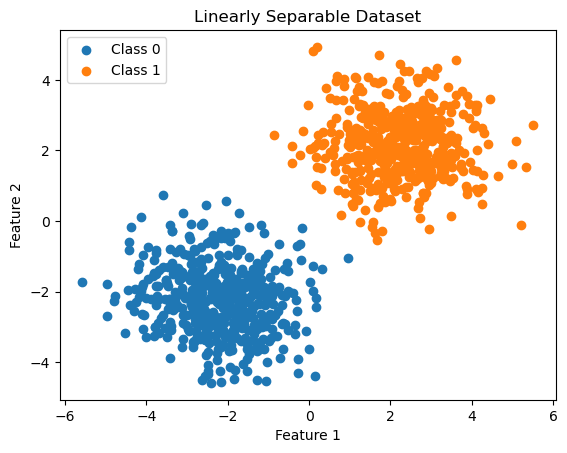

In [6]:
# Plot the dataset
plt.scatter(X[y == -1, 1], X[y == -1, 2], label="Class 0")
plt.scatter(X[y == 1, 1], X[y == 1, 2], label="Class 1")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Dataset")
plt.show();

**Train the Perceptron Learning Algorithm on this dataset.**

In [7]:
# Initialize W with all 0s
w = np.zeros(X.shape[1])

# number of updates
k = 0

misclass_history = []

In [8]:
# The perceptron training algorithm

def perceptron_fit(X, y, w, k, max_iter):

  for iteration in range(max_iter):
    for i in range(len(X)):
      if y[i] * w.dot(X[i]) <= 0:
        k = k+1
        w = w + y[i]*X[i]

    nb_miss =0
    print(f"Parameters after iteration {iteration+1} : {w}")
    for i in range(len(X)):
      if y[i] * w.dot(X[i]) <= 0:
        nb_miss=nb_miss+1
    print(f"Misclassification: {nb_miss}\n")
    misclass_history.append(nb_miss)

    if nb_miss==0:
      print(f"Converged successfully with a total of {k} updates")
      return w

  print(f'Maximum number of iterations reached. Total updates {k}')
  return w

In [9]:
# Call the traning algorithm
optimal_w = perceptron_fit(X,y, w, k, 5)

Parameters after iteration 1 : [0.         2.24848727 2.73041441]
Misclassification: 0

Converged successfully with a total of 2 updates


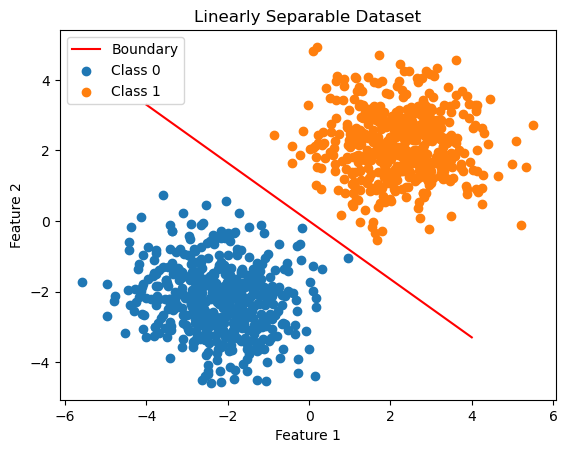

In [10]:
# Plot the dataset
x_lin = np.linspace(-4,4,100)
y_lin = -(optimal_w[0]/optimal_w[2]) -(optimal_w[1]/optimal_w[2]) * x_lin
plt.plot(x_lin, y_lin, '-r', label='Boundary');

plt.scatter(X[y == -1, 1], X[y == -1, 2], label="Class 0")
plt.scatter(X[y == 1, 1], X[y == 1, 2], label="Class 1")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Dataset")
plt.show();

In [11]:
optimal_w

array([0.        , 2.24848727, 2.73041441])